In [715]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime
from datetime import date
import math
import random
from scipy import stats

In [716]:
#Load data set here
data = pd.read_csv('../dataset_final_v3.csv') 

In [717]:
# data

In [718]:
# Filter by year (int)

year = 2018

if isinstance(year, int):
    data = data[data['year'] == year]
    
# Remove papers with no citation data
    
data = data[data['citations'] >= 0]

# Look only at accepted papers to control for conference acceptance
decision = 'all'
'''
decision_to_numeric = {'all': [-1,3], 'accept':[1,3], 'reject':[-1,0], 'poster':[1,1], 'oral':[2,2], 'spotlight':[3,3]
                      , 'workshop':[0,0]}


data = data[(decision_to_numeric[decision][0] <= data['decision']) & (data['decision'] <= decision_to_numeric[decision][1])]
''';
#data = data[data['decisions'].str.contains("Accept")]
#data = data[data['decisions'].str.contains("Accept") == False]

In [719]:
# Average score
scores = data.iloc[:, 5:6].values
for i in range (len(scores)):
    arr = str(scores[i][0]).split(";")
    for j in range (len(arr)):
        arr[j] = float(arr[j])
    if len(arr) != 0:
        val = sum(arr)/len(arr)
    scores[i] = val
scores = [score[0] for score in scores]
    
# Citation rate 
citations = data.iloc[:, 18:19].values
citations = [citation[0] for citation in citations]
dates = data.iloc[:, 17:18].values
now = datetime.datetime.now();
for i in range(len(dates)):
    arr = dates[i][0].split("/")
    d0 = date(int(arr[2]) + 2000, int(arr[0]), int(arr[1]))
    d1 = date(now.year, now.month, now.day)
    delta = d1 - d0
    # Can either transform or leave as-is
    citations[i] = float((citations[i])/delta.days)
    # citations[i] = float(math.sqrt(citations[i])/delta.days)
    
# Histogram of citation rates  
'''
plt.hist(citations)
plt.title('Citation rates for ICLR {} Papers'.format(year))
plt.xlabel('Citations/day')
# plt.xlabel('sqrt(Citations)/day')
plt.ylabel('Frequency')
plt.show()
''';

In [720]:
# Spearman correlation coefficient

# Rank scores and citations, breaking ties randomly. (Done by permuting scores + citations separately, assigning ranks,
# breaking ties based on order, then returning to original order)

scores = np.array(scores)
citations = np.array(citations)
p1 = np.random.permutation(len(scores))
p2 = np.random.permutation(len(scores))
scores = scores[p1]
citations = citations[p2]
scores = pd.Series(scores).rank(method='first', ascending = False)
citations = pd.Series(citations).rank(method='first', ascending = False)
scores = scores[np.argsort(p1)]
citations = citations[np.argsort(p2)]

spearman = stats.spearmanr(scores, citations)
print(spearman)

# Combine scores, citations, decisions into one data frame for plotting

scores_and_citations = pd.DataFrame([scores.tolist(), citations.tolist()]).transpose()
scores_and_citations.columns = ['scores', 'citations']
scores_and_citations['decisions'] = list(data['decisions'])

for i in range(len(scores_and_citations)):
    if scores_and_citations.at[i, 'decisions'] == 'Accept (Talk)':
        scores_and_citations.at[i, 'decisions'] = 'Accept (Oral)'

SpearmanrResult(correlation=0.6197214180372105, pvalue=3.524707078949833e-102)


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 None (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725) None
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)].

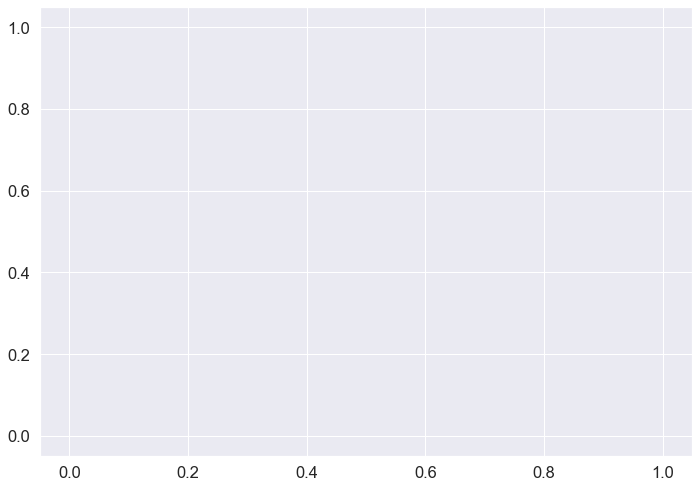

In [722]:
'''plt.figure(figsize = (8,6))
plt.scatter(scores, citations, color = c, alpha = 0.25)
plt.title("Citation Rank vs. Score Rank for ICLR {}".format(year))
plt.xlabel('Score rank')
plt.ylabel('Citation rank')

plt.show()''';
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale = 1.5)
g = sns.scatterplot(data=scores_and_citations, x='scores', y='citations', hue='decisions', 
                hue_order = ['Reject', 'Accept (Poster)', 'Accept (Spotlight)', 'Accept (Oral)', 'Withdrawn'],
                alpha = 0.6)
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
plt.title('Citation Rate Rank vs. Score Rank for ICLR {} Papers'.format(year))
fig.text(0.91, 0.15, "Spearman correlation: {}\np-value < 0.0001".format(spearman[0].round(3)), horizontalalignment='left', size='medium', color='black')

In [186]:
# Histogram of top 10% citation rate papers vs all papers
scores = np.array(scores)
citations = np.array(citations)
p = np.random.permutation(len(citations))
citations = citations[p]
citations = pd.Series(citations).rank(method='first', ascending = False)
citations = citations[np.argsort(p)]

scores_and_citations = pd.DataFrame([scores, citations]).transpose()
scores_and_citations_top10 = scores_and_citations[scores_and_citations[1] <= len(citations)/10]

print('Mean score for all papers: {}'.format(sum(scores_and_citations[0])/len(scores_and_citations[0])))
print('Mean score for top 10% papers: {}'.format(sum(scores_and_citations_top10[0])/len(scores_and_citations_top10[0])))

Mean score for all papers: 1237.5
Mean score for top 10% papers: 1536.65991902834


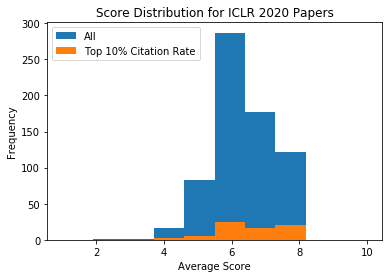

In [99]:
plt.hist(scores_and_citations[0], range=[1,10])
plt.hist(scores_and_citations_top10[0], range=[1,10])
plt.title('Score Distribution for ICLR {} Papers'.format(year))
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(['All', 'Top 10% Citation Rate'])
plt.show()

In [1093]:
'''
plt.scatter(x, citations, color = 'blue', alpha = 0.25)
plt.title("Power-transformed Citations/Day vs Average Score \n (year = {}, decision = {})"
          .format(year, decision))
plt.xlabel("Average score")
plt.ylabel("citation_rate^(1/5)" )
# plt.savefig("power_transformed_citations_{}_{}.png".format(year, decision))
''';

In [1094]:
'''
# Filter by year (int) and paper category (Accept/Reject)

year = 2017
decision = 'all'
decision_to_numeric = {'all': [-1,3], 'accept':[1,3], 'reject':[-1,0], 'poster':[1,1], 'oral':[2,2], 'spotlight':[3,3]
                      , 'workshop':[0,0]}

if isinstance(year, int):
    data = data[data['year'] == year]
data_accept = data[(1 <= data['decision']) & (data['decision'] <= 3)]
data_reject = data[(-1 <= data['decision']) & (data['decision'] <= 0)]
                                              
# Average score
x_accept = data_accept.iloc[:, 5:6].values
for i in range (len(x_accept)):
    arr = str(x_accept[i][0]).split(";")
    for j in range (len(arr)):
        arr[j] = float(arr[j])
    if len(arr) != 0:
        val = sum(arr)/len(arr)
    x_accept[i] = val
                                              
x_reject = data_reject.iloc[:, 5:6].values
for i in range (len(x_reject)):
    arr = str(x_reject[i][0]).split(";")
    for j in range (len(arr)):
        arr[j] = float(arr[j])
    if len(arr) != 0:
        val = sum(arr)/len(arr)
    x_reject[i] = val
    
# Citation rate 
citations_accept = data_accept.iloc[:, 18:19].values
citations_accept = [citation[0] for citation in citations_accept]
dates = data_accept.iloc[:, 17:18].values
now = datetime.datetime.now();
for i in range(len(dates)):
    arr = dates[i][0].split("/")
    d0 = date(int(arr[2]), int(arr[0]), int(arr[1]))
    d1 = date(now.year, now.month, now.day)
    delta = d1 - d0
    # Can either log transform or leave as-is
    citations_accept[i] = float(citations_accept[i]/delta.days)**(1/5)

citations_reject = data_reject.iloc[:, 18:19].values
citations_reject = [citation[0] for citation in citations_reject]
dates = data_reject.iloc[:, 17:18].values
now = datetime.datetime.now();
for i in range(len(dates)):
    arr = dates[i][0].split("/")
    d0 = date(int(arr[2]), int(arr[0]), int(arr[1]))
    d1 = date(now.year, now.month, now.day)
    delta = d1 - d0
    # Can either log transform or leave as-is
    citations_reject[i] = float(citations_reject[i]/delta.days)**(1/5)
    ''';

In [1095]:
'''
plt.scatter(x_accept, citations_accept, color = 'blue', label= 'accept', alpha=0.125)
plt.scatter(x_reject, citations_reject, color = 'red', label= 'reject', alpha=0.125)
plt.title("Power-transformed Citations/Day vs Average Score \n (year = {})"
          .format(year))
plt.legend(loc='upper left')
plt.xlabel("Average score")
plt.ylabel("citation_rate" )
plt.savefig("power_transformed_citations_{}_{}.png".format(year, decision))
''';